# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 12/7/1987
* Student Name: Benjamin Ballard
* Student Net ID: bkq5nt
* This URL: https://github.com/ballard11/DS5100-2022-08-O/blob/main/final-project-info/FinalProjectSubmissionTemplate.ipynb
* GitHub Repo URL: https://github.com/ballard11/DS5100-2022-08-O/tree/main/final-project-info

# The Monte Carlo Module

In [101]:
import numpy as np
import pandas as pd
import random as rm

class Die():

    def __init__(self, faces):
        """ This is the Create_Die docstring
        
        Attributes
        ==========
        faces: int or str
            the number of str on the face of the 'die'
        weights: int
            weight of each corresponding face, relating to liklihood of rolling that face.
        
        Methods
        =======
        change_weight:
            changes the weight of the die
        roll_die:
            plays the dice 'game'
        show:
            shows the results

        """
        
    # The Initializer Method: Takes an array of faces as an argument.
           
        flag = len(set(faces)) == len(faces)
        if flag == 0:
            raise ValueError("Each value must be Unique.") 
    
        #Faces
        #Asigns FACES to self, the length of the User Inputted array
        self.faces = faces
        self.n_faces = len(faces)
        self.weights = np.ones(len(faces))
    
        #Create Dataframe to save values        
        self.my_die= pd.DataFrame({
          #  'Face':range(1,self.n_faces+1),
            'Face':faces,
            'Weight':self.weights})


    def change_weight(self, f_change, weight):
        """ f_change is the name of the face - it could be a str or int"""
        # Changes_Weight Method: changes the weight of a single face provided (x) - Seems to work overall. 

        weight = float(weight)

        #Re-evaluate for string
        if f_change in self.faces:
            #self.my_die.loc[df['Face'] == f_change , "Weight" ] = weight
            self.my_die.loc[self.my_die['Face'] == f_change , "Weight" ] = weight

            #I'm finding 'H/T' and changing the weight.
            print(self.my_die)
        else:
            print("Value is not on the Die.  (i.e. User provided value is not in the array.)")
            #Raise an Error instead.

            
    def roll_die(self, n_rolls=1):
        """A method to roll the die one or more times. """
        Rolled_faces_and_weights_df = self.my_die.sample(n=n_rolls, replace = True, weights = "Weight").reset_index(drop= True)
        return list(Rolled_faces_and_weights_df['Face'])    

                                                
    def show(self, wide_or_narrow = "wide"):
        """A method to show the user the dies current set of faces and weights (since the latter can be changed). """   
        if wide_or_narrow == 'wide':
            return self.my_die
        
        elif wide_or_narrow =='narrow':
            my_die_narrow = self.my_die.stack().to_frame('Faces')
            my_die_narrow.index.rename(["Roll Number","Dice"], inplace = True)
            return my_die_narrow
        else:
            raise ValueError("Arrgument must be either \"narrow\" or \"wide\"")
    
        print(self.my_die)
        
class Game(Die): 
    
    def __init__(self,die_list):
        """Game class docstring: A game consists of rolling of one or more dice of the same kind one or more times.
        
        Attributes
        ==========
        die list:
            Must be passed a list of die created using the Die class.
        faces: int or str
        weights: int
        
        Methods
        =======
        play:
            Takes a parameter to specify how many times the dice should be rolled.
        get_results:
            method shows the user the results of the most recent play.        
        
        """      
        self.die_list=die_list
        self.num_rolls = len(die_list)
        self.results = pd.DataFrame()
        self.my_die = pd.DataFrame()                      

    def play(self, num_rolls):
        self.my_die.index.rename("Roll Number", inplace = True)
        
        for die in range(0, len(self.die_list)):
            self.my_die[die] = self.die_list[die].roll_die(num_rolls)
        
    
    def get_results(self, wide_or_narrow = "wide"):
       # A method to show the user the die’s current set of faces and weights (since the latter can be changed). (X)
       # Returns the dataframe created in the initializer but possibly updated by the weight changing method. (X)
    
        if wide_or_narrow == 'wide':
            return self.my_die
        
        elif wide_or_narrow =='narrow':
            my_die_narrow = self.my_die.stack().to_frame('Faces')
            my_die_narrow.index.rename(["Roll Number","Die"], inplace = True)
            return my_die_narrow
        else:
            raise ValueError("Arrgument must be either \"narrow\" or \"wide\"")
    
    
class Analyzer(Game): 
    """An analyzer takes the results of a single game and computes various descriptive statistical properties about it.
            
        Methods
        =======
        get_face_count:
            A face counts per roll method to compute how many times a given face is rolled in each event.
        get_permutation:
            A combo method to compute the distinct combinations of faces rolled, along with their counts.
        get_jackpot:
            A jackpot method to compute how many times the game resulted in all faces being identical.
    """
    
    def __init__(self, game):
        self.game_results = game.get_results()
        self.number_of_dice = len(list(self.game_results))
        self.jackpot = 0
        self.face_count = pd.DataFrame()
        self.combos = {}
        self.temp_df = pd.DataFrame()
        number_of_dice = 0

    def get_face_count(self):
        """A face counts per roll, i.e. the number of times a given face appeared in each roll. 
         For example, if a roll of five dice has all sixes, then the counts for this roll would be 6 for the face value '6' and 0 for the other faces."""
        self.temp_df = pd.DataFrame(self.game_results.transpose().melt(var_name='rolls',value_name='faces'))
        self.face_counts = pd.crosstab(index=self.temp_df['rolls'],columns=self.temp_df['faces'])
        return self.face_counts
    
    def get_combo(self):
        """A combo count, i.e. how many combination types of faces were rolled and their counts."""
        face_count = self.get_face_count()  
        listtest = face_count.values.tolist()
        for i in listtest:
            value_string = ' '.join(str(e) for e in i)
            self.combos[value_string] = listtest.count(i)    
        return self.combos
          
    def get_jackpot(self, game):
        """A jackpot count, i.e. how many times a roll resulted in all faces being the same, e.g. six ones for a six-sided die."""
        # iterate over the resulting dataframe and find any time a value includes the number of dice rolled and every time that's true you add to jackpot
        face_count = self.get_face_count()
        listtest = face_count.values.tolist()
        #print(game.num_rolls)
        for i in listtest:
            if game.num_rolls in i:
                self.jackpot += 1
        return self.jackpot    
    


# Test Module

In [105]:
# A code block with your test code.
#%pwd
#python MonteCarloUnitTest.py 

!python MonteCarloUnitTest.py -v> montecarlo_test_results.txt


test_1_Die_create_die (__main__.MonteCarloTest) ... ok
test_2_Die_change_weight (__main__.MonteCarloTest) ... ok
test_3_Die_show (__main__.MonteCarloTest) ... ok
test_4_Die_roll_die (__main__.MonteCarloTest) ... ok
test_5_Die_show (__main__.MonteCarloTest) ... ok
test_6_Game_play (__main__.MonteCarloTest) ... ok
test_7_Game_show (__main__.MonteCarloTest) ... ok
test_8_Analyzer_get_face_count (__main__.MonteCarloTest) ... ok
test_9_Analyzer_get_combo (__main__.MonteCarloTest) ... ok
test_9_Analyzer_get_jackpot_Analyzer (__main__.MonteCarloTest) ... ok

----------------------------------------------------------------------
Ran 10 tests in 0.232s

OK


In [77]:
import unittest 
import numpy as np
import pandas as pd
import random as rm
from MonteCarlo import Die,Game,Analyzer

class MonteCarloTest(unittest.TestCase):
    
    def test_1_Die_create_die(self):    
        testdie = [1,2]
        df1 = Die(testdie)
        df2 = pd.DataFrame({'Face':[1,2],'Weight':[1,1]})
        self.assertTrue(df1, df2) 
        
    def test_2_Die_change_weight(self):
        testdie = [1,2]
        df1 = Die(testdie)
        df1.change_weight(1,2)
        df2 = pd.DataFrame({'Face':[1,2],'Weight':[2,1]})
        self.assertTrue(df1, df2)      
        
    def test_3_Die_show(self):
        testdie = [1,2]
        df1 = Die(testdie)
        df1.change_weight(1,2)
        df2 = pd.DataFrame({'Face':[1,2],'Weight':[2,1]})
        self.assertTrue(df1, df2)     
        
    def test_4_Die_roll_die(self):
        first = Die(["1","2","3",4,5,6,7,8,9,10,11,12])
        df1=len(first.roll_die(3))
        df2=3
        self.assertTrue(df1, df2)     
        
    def test_5_Die_show(self):           
        sixsided = [1,2,3,4,5,6]
        testdie1 = Die(sixsided)
        testdie1.roll_die(2)
        testdie1.show()
        df1=len(testdie1.show())
        df2=6
        self.assertTrue(df1, df2)     
        
    def test_6_Game_play(self):
        first = Die(["1","2","3",4])
        second = Die([1,2,3,4])
        third = Die([1,2,3,4])
        testGame=Game([first,second,third])
        testGame.play(1000)
        df1=len(testGame.my_die)
        df2=1000
        self.assertTrue(df1, df2)     

    def test_7_Game_show(self):
        first = Die(["1","2","3",4,5,6,7,8,9,10,11,12])
        second = Die([1,2,3,4,5,6,7,8,9,10,11,12])
        third = Die([1,2,3,4,5,6,7,8,9,10,11,12])
        testGame=Game([first,second,third])
        testGame.play(10)
        testGame.get_results("wide")
        df1=len(testGame.show())
        df2=10
        self.assertTrue(df1, df2)     
    
    def test_8_Analyzer_get_face_count(self):
        first = Die(["1","2","3",4,5,6,7,8,9,10,11,12])
        second = Die([1,2,3,4,5,6,7,8,9,10,11,12])
        third = Die([1,2,3,4,5,6,7,8,9,10,11,12])
        testGame=Game([first,second,third])
        testGame.play(10)
        testGame.get_results("wide")
        analysis = Analyzer(testGame)
        df1=len(analysis.get_face_count())
        df2=1000
        self.assertTrue(df1, df2)     
    
    def test_9_Analyzer_get_jackpot_Analyzer(self):
        first = Die(["1","2","3",4,5,6,7,8,9,10,11,12])
        second = Die([1,2,3,4,5,6,7,8,9,10,11,12])
        third = Die([1,2,3,4,5,6,7,8,9,10,11,12])
        testGame=Game([first,second,third])
        testGame.play(10)
        testGame.get_results("wide")
        analysis = Analyzer(testGame)
        df1=len(analysis.get_combo())
        df2=21
        self.assertTrue(df1, df2)         
    
    def test_9_Analyzer_get_combo(self):
        first = Die(["1","2","3",4,5,6,7,8,9,10,11,12])
        second = Die([1,2,3,4,5,6,7,8,9,10,11,12])
        third = Die([1,2,3,4,5,6,7,8,9,10,11,12])
        testGame=Game([first,second,third])
        testGame.play(10)
        testGame.get_results("wide")
        analysis = Analyzer(testGame)
        df1=len(analysis.get_combo())
        df2=21
        self.assertTrue(df1, df2)    
        #https://python.plainenglish.io/unit-tests-with-pandas-bf4c596baeda


# Test Results

# A text block with the output of a successful test.

..........
----------------------------------------------------------------------
test_1_Die_create_die (__main__.MonteCarloTest) ... ok
test_2_Die_change_weight (__main__.MonteCarloTest) ... ok
test_3_Die_show (__main__.MonteCarloTest) ... ok
test_4_Die_roll_die (__main__.MonteCarloTest) ... ok
test_5_Die_show (__main__.MonteCarloTest) ... ok
test_6_Game_play (__main__.MonteCarloTest) ... ok
test_7_Game_show (__main__.MonteCarloTest) ... ok
test_8_Analyzer_get_face_count (__main__.MonteCarloTest) ... ok
test_9_Analyzer_get_combo (__main__.MonteCarloTest) ... ok
test_9_Analyzer_get_jackpot_Analyzer (__main__.MonteCarloTest) ... ok

----------------------------------------------------------------------
Ran 10 tests in 0.194s

OK

-- code from calling:
    !python MonteCarloUnitTest.py >results.txt


# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

  Face  Weight
0    H     5.0
1    T     1.0
3
3


Text(0.5, 1.0, 'Scenario 1: 2-headed coin')

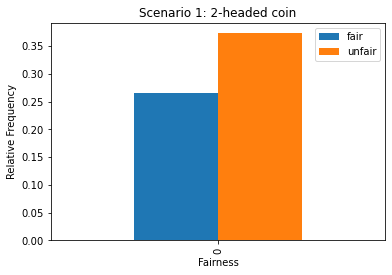

In [102]:
from MonteCarlo import Die, Game, Analyzer

##Scenario 1
fair_coin = Die(["H","T"])

unfair_coin = Die(["H","T"])
unfair_coin.change_weight("H",5)

number_of_flips = 1000

fair_coin_set = [fair_coin, fair_coin, fair_coin]
fair_game = Game(fair_coin_set)
fair_game.play(number_of_flips)

unfair_coin_set = [unfair_coin, unfair_coin, fair_coin]
unfair_game = Game(unfair_coin_set)
unfair_game.play(number_of_flips)

unfair_game_analyzer = Analyzer(unfair_game)
unfair_game_analyzer.get_face_count()
unfair_game_analyzer.get_combo()

fair_game_analyzer = Analyzer(fair_game)
fair_game_analyzer.get_face_count()
fair_game_analyzer.get_combo()
#Same error on GetCombo AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

fair_relative_frequency = fair_game_analyzer.get_jackpot(fair_game)/number_of_flips
unfair_relative_frequency = unfair_game_analyzer.get_jackpot(unfair_game)/number_of_flips

value_df = pd.DataFrame({"fair":[fair_relative_frequency], "unfair": [unfair_relative_frequency]})

#Graph
plt = value_df.plot.bar()
plt.set_xlabel("Fairness")
plt.set_ylabel("Relative Frequency")
plt.set_title("Scenario 1: 2-headed coin")


## Scenario 2

   Face  Weight
0     1     1.0
1     2     1.0
2     3     1.0
3     4     1.0
4     5     1.0
5     6     5.0
   Face  Weight
0     1     1.0
1     2     1.0
2     3     1.0
3     4     1.0
4     5     1.0
5     6     5.0
   Face  Weight
0     1     5.0
1     2     1.0
2     3     1.0
3     4     1.0
4     5     1.0
5     6     1.0
3
3


Text(0.5, 1.0, 'Scenario 2: 6-sided die')

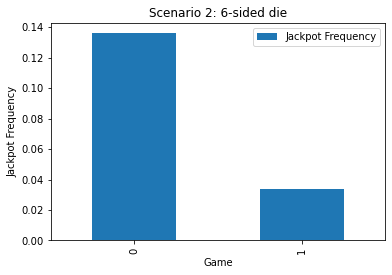

In [103]:
# Code blocks with output

#cenario 2: 6-sided die
    #Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will weight 1 five times more than the others.
    #Play a game of 10000 rolls with 5 fair dice.
    #Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.
    #For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.
    #Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

unfair_dice_11 = Die([1,2,3,4,5,6])
unfair_dice_11.change_weight(6,5)

unfair_dice_2Type1 = Die([1,2,3,4,5,6])
unfair_dice_2Type1.change_weight(6,5)

unfair_dice_2Type2 = Die([1,2,3,4,5,6])
unfair_dice_2Type2.change_weight(1,5)

unfair_game = Game([unfair_dice_11, unfair_dice_2Type1, unfair_dice_2Type2])
unfair_game.play(1000)
unfair_analyzer = Analyzer(unfair_game)

fair_game = Game([unfair_dice_11, unfair_dice_11, unfair_dice_11])
fair_game.play(1000)
fair_analyzer = Analyzer(fair_game)

unfair_rel_freq = unfair_analyzer.get_jackpot(unfair_game)/1000
all_fair_rel_freq = fair_analyzer.get_jackpot(unfair_game)/1000

Unfair_analyzer_combo = unfair_analyzer.get_combo()

scenario_2_df = pd.DataFrame({'Game':['All Fair Dice','Unfair Dice'], 'Jackpot Frequency': [all_fair_rel_freq, unfair_rel_freq]})

#scenario_2_df = pd.DataFrame({'Game':[all_fair_rel_freq], 'Jackpot Frequency': [unfair_relative_frequency]})

plt = scenario_2_df.plot.bar()
plt.set_xlabel("Game")
plt.set_ylabel("Jackpot Frequency")
plt.set_title("Scenario 2: 6-sided die")


 

## Scenario 3

In [114]:
#Scenario 3
    #Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights.
    #Play a game involving 5 of these dice with 1000 rolls.
    #Generate 10 random samples of 10 from your data and count the number of times you see a word that looks like an English word in each sample. Keep a running count; this will result in an estimate of the percent of English words in the data. 

Alpha_die = Die(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])

Alpha_die.change_weight("A", 8.4966)
Alpha_die.change_weight("B", 2.0720)
Alpha_die.change_weight("C", 4.5388)
Alpha_die.change_weight("D", 3.3844)
Alpha_die.change_weight("E", 11.1607)
Alpha_die.change_weight("F", 1.8121)
Alpha_die.change_weight("G", 2.4705)
Alpha_die.change_weight("H", 3.0034)
Alpha_die.change_weight("I", 7.5448)
Alpha_die.change_weight("J", 0.1965)
Alpha_die.change_weight("K", 1.1016)
Alpha_die.change_weight("L", 5.4893)
Alpha_die.change_weight("M", 3.0129)
Alpha_die.change_weight("N", 6.6544)
Alpha_die.change_weight("O", 7.1635)
Alpha_die.change_weight("P", 3.1671)
Alpha_die.change_weight("Q", 0.1962)
Alpha_die.change_weight("R", 7.5809)
Alpha_die.change_weight("S", 5.7351)
Alpha_die.change_weight("T", 6.9509)
Alpha_die.change_weight("U", 3.6308)
Alpha_die.change_weight("V", 1.0074)
Alpha_die.change_weight("W", 1.2899)
Alpha_die.change_weight("X", 0.2902)
Alpha_die.change_weight("Y", 1.7779)
Alpha_die.change_weight("Z", 0.2722)

scenario3_game = Game([Alpha_die,Alpha_die,Alpha_die,Alpha_die,Alpha_die])
scenario3_game.play(10)
scenario_3_analyzer = Analyzer(scenario3_game)


   Face  Weight
0     A  8.4966
1     B  1.0000
2     C  1.0000
3     D  1.0000
4     E  1.0000
5     F  1.0000
6     G  1.0000
7     H  1.0000
8     I  1.0000
9     J  1.0000
10    K  1.0000
11    L  1.0000
12    M  1.0000
13    N  1.0000
14    O  1.0000
15    P  1.0000
16    Q  1.0000
17    R  1.0000
18    S  1.0000
19    T  1.0000
20    U  1.0000
21    V  1.0000
22    W  1.0000
23    X  1.0000
24    Y  1.0000
25    Z  1.0000
   Face  Weight
0     A  8.4966
1     B  2.0720
2     C  1.0000
3     D  1.0000
4     E  1.0000
5     F  1.0000
6     G  1.0000
7     H  1.0000
8     I  1.0000
9     J  1.0000
10    K  1.0000
11    L  1.0000
12    M  1.0000
13    N  1.0000
14    O  1.0000
15    P  1.0000
16    Q  1.0000
17    R  1.0000
18    S  1.0000
19    T  1.0000
20    U  1.0000
21    V  1.0000
22    W  1.0000
23    X  1.0000
24    Y  1.0000
25    Z  1.0000
   Face  Weight
0     A  8.4966
1     B  2.0720
2     C  4.5388
3     D  1.0000
4     E  1.0000
5     F  1.0000
6     G  1.0000
7     H 

In [122]:

import enchant
english_dict = enchant.Dict("en_us")

games_with_jackpot = 0
i = 1

while i < 11:
    jackpots = 0
    scenario3_game.play(10)
    df = scenario3_game.show()
    results = df.values.tolist()
    for result in results:
        print('result', "".join(result))
        if english_dict.check("".join(result)):
            jackpots += 1
    print('jackpots', jackpots)
    if jackpots > 0:
        games_with_jackpot += 1
    i += 1


print('games', games_with_jackpot)

#the print out below shows the letter results from the die.  if there is a word found, the term jackpot prints a 1.  
#this is a rare event, as it it not common that a term is found.  Less than 5% of the time.

result VNMST
result URBED
result OOEAO
result TERNB
result BGEGY
result WUERU
result VSLIA
result IENKI
result GYCSO
result APIOM
jackpots 0
result SRBHN
result ASOCC
result EVSCI
result CTERR
result NYGNA
result UANAD
result SAOFU
result OENUS
result NICAP
result COGNA
jackpots 0
result CEURY
result EHNSA
result RHIOA
result OAIRO
result EBNTG
result AHSUT
result PFEUF
result TEPOT
result AAITE
result TSTTI
jackpots 0
result ATIDE
result TTCUN
result EOEEI
result SGOHC
result LCONO
result KSOET
result VBRUD
result CBREH
result ENMNC
result LUHEO
jackpots 0
result ORERE
result DMPLU
result NOREI
result PIVEL
result INRCI
result CRBAN
result QGLYM
result FCRCI
result GEYRO
result DAOAY
jackpots 0
result ROQIA
result CILAO
result ETAEE
result CNAAA
result TFAAE
result LORLA
result EEWIE
result IAIMA
result EOOAS
result TTSOE
jackpots 0
result EIOLR
result PRDNO
result CITLL
result AETWY
result KLDTS
result EETEE
result AIEOS
result NVMSB
result CYOAE
result SWTAF
jackpots 0
result GCIMC


# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [104]:
%ls -lRF -o
%ls


 Volume in drive C has no label.
 Volume Serial Number is 0C05-53DB

 Directory of C:\Users\Ben\OneDrive\Documents\UVA 1st Semester\Programming New Github\DS5100-2022-08-O\final-project-info


 Directory of C:\Users\Ben\OneDrive\Documents\UVA 1st Semester\Programming New Github\DS5100-2022-08-O\final-project-info



File Not Found


 Volume in drive C has no label.
 Volume Serial Number is 0C05-53DB

 Directory of C:\Users\Ben\OneDrive\Documents\UVA 1st Semester\Programming New Github\DS5100-2022-08-O\final-project-info

12/08/2022  06:50 PM    <DIR>          .
12/08/2022  06:50 PM    <DIR>          ..
12/08/2022  06:41 PM    <DIR>          .ipynb_checkpoints
12/07/2022  10:06 PM    <DIR>          __pycache__
12/07/2022  07:05 PM    <DIR>          Archive
12/08/2022  06:50 PM            58,452 FinalProjectSubmissionTemplate.ipynb
12/07/2022  10:15 PM    <DIR>          MonteCarlo.egg-info
12/07/2022  10:06 PM             7,201 MonteCarlo.py
12/08/2022  06:45 PM                 0 montecarlo__test_results.txt
12/07/2022  07:06 PM                 0 montecarlo_test_results.txt
12/06/2022  04:05 PM             1,726 montecarlo_tests.py
12/07/2022  10:06 PM            70,129 MonteCarlo-Main.ipynb
12/07/2022  10:11 PM             3,535 MonteCarloUnitTest.py
12/07/2022  10:33 PM             6,323 ReadMe.txt
12/07/2022  06:

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [ ]:
# Installation commands

In [68]:
!pip install -e .

Obtaining file:///C:/Users/Ben/OneDrive/Documents/UVA%201st%20Semester/Programming%20New%20Github/DS5100-2022-08-O/final-project-info
  Attempting uninstall: MonteCarlo
    Found existing installation: MonteCarlo 3.0.0
    Uninstalling MonteCarlo-3.0.0:
      Successfully uninstalled MonteCarlo-3.0.0
  Running setup.py develop for MonteCarlo


In [74]:
help(Die)
help(Game)
help(Analyzer)

Help on class Die in module MonteCarlo:

class Die(builtins.object)
 |  Die(faces)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, faces)
 |      This is the Create_Die docstring
 |      
 |      Attributes
 |      ==========
 |      faces: int or str
 |          the number of str on the face of the 'die'
 |      weights: int
 |          weight of each corresponding face, relating to liklihood of rolling that face.
 |      
 |      Methods
 |      =======
 |      change_weight:
 |          changes the weight of the die
 |      roll_die:
 |          plays the dice 'game'
 |      show:
 |          shows the results
 |  
 |  change_weight(self, f_change, weight)
 |      f_change is the name of the face - it could be a str or int
 |  
 |  roll_die(self, n_rolls=1)
 |      A method to roll the die one or more times.
 |  
 |  show(self, wide_or_narrow='wide')
 |      A method to show the user the dies current set of faces and weights (since the latter can be changed).
 |  
 |  -------